# OASIS INFOBYTE  **TASK-01**


# Iris Flower Classification

###Importing required libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cfmt,classification_report as clrt

### Reading and Preprocessing the given IRIS dataset.

In [33]:
df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
#first 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#last 5 rows of the dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Checking for NULL values in the dataset

In [36]:
#This function checks and gives sum of NULL values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
#This function gives total no. of duplicate rows in the dataset
df.duplicated().sum()

0

From above we can see that there are no null values and duplicated rows in the dataset

In [38]:
#Getting dimensions of the dataset
df.shape

(150, 6)

Droping unrequired ID column from the dataset

In [39]:
dt=df.drop(columns=["Id"])
dt

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Above, we can see Id column is removed

In [40]:
dt.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Replacing the names(Iris-setosa, Iris-versicolor, Iris-virginica) with 1, 2, 3

In [41]:
dt["Species"].replace({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3},inplace = True)

In [42]:
print(dt)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        3
146            6.3           2.5            5.0           1.9        3
147            6.5           3.0            5.2           2.0        3
148            6.2           3.4            5.4           2.3        3
149            5.9           3.0            5.1           1.8        3

[150 rows x 5 columns]


Plotting histogram for each different measurement of the flowers

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

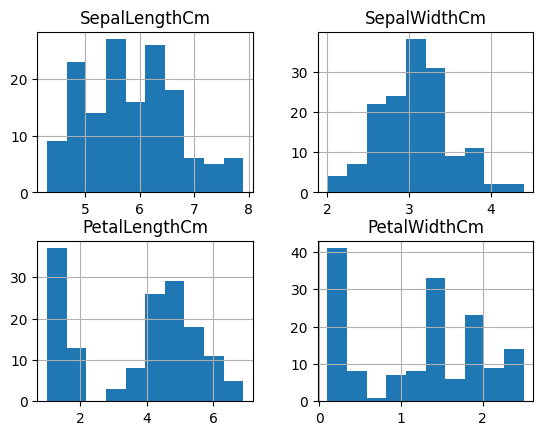

In [43]:
hmap=dt.iloc[:,:-1]
hmap.hist()

Plotting Heatmap for the dataset

<Axes: >

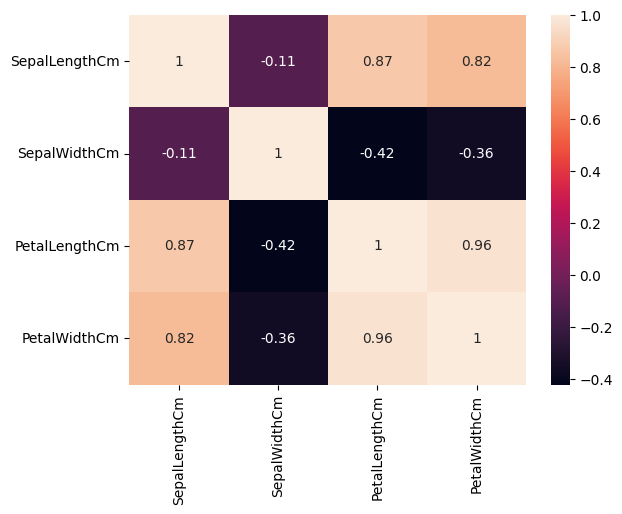

In [44]:
sbn.heatmap(hmap.corr(),annot=True)

### Dividing the whole dataset into Independent and Dependent variables

In [45]:
#Independent variables
x=df.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [46]:
#Dependent variables
y=dt.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Dividing both independent and dependent variables into Train and Test datasets

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Train dataset

In [48]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,62,5.9,3.0,4.2,1.5
92,93,5.8,2.6,4.0,1.2
112,113,6.8,3.0,5.5,2.1
2,3,4.7,3.2,1.3,0.2
141,142,6.9,3.1,5.1,2.3
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


In [49]:
y_train

array([2, 2, 3, 1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3,
       2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 1,
       3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 2,
       3, 1])

Dimensions of Train dataset

In [50]:
print("Size of x_train is",x_train.shape)
print("Size of y_train is",y_train.shape)

Size of x_train is (112, 5)
Size of y_train is (112,)


Test dataset

In [51]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,115,5.8,2.8,5.1,2.4
62,63,6.0,2.2,4.0,1.0
33,34,5.5,4.2,1.4,0.2
107,108,7.3,2.9,6.3,1.8
7,8,5.0,3.4,1.5,0.2
100,101,6.3,3.3,6.0,2.5
40,41,5.0,3.5,1.3,0.3
86,87,6.7,3.1,4.7,1.5
76,77,6.8,2.8,4.8,1.4
71,72,6.1,2.8,4.0,1.3


In [52]:
y_test

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 2])

Dimensions of Test dataset

In [53]:
print("Size of x_test is",x_test.shape)
print("Size of y_test is",y_test.shape)

Size of x_test is (38, 5)
Size of y_test is (38,)


### Training the model with LogisticRegression using Train data

In [54]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Giving Test data to the trained model to predict output

In [55]:
y_pred=model.predict(x_test)
print("Predicted output for test input",y_pred)
print("Actual output for test input",y_test)

Predicted output for test input [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 2]
Actual output for test input [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 2]


Calulating accuracy of the model

In [56]:
acc=accuracy_score(y_pred,y_test)*100
print("Accuracy for predicted output:",acc)

Accuracy for predicted output: 100.0


### Training the model with KNN Neighbours Classifier using Train data

In [57]:
#take K=6
k=6
model=KNeighborsClassifier(k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

Giving Test data to the trained model to predict output


In [58]:
y_pred=model.predict(x_test)
print("Predicted output for test input",y_pred)
print("Actual output for test input",y_test)

Predicted output for test input [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 2]
Actual output for test input [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 2]


Calulating accuracy of the model

In [59]:
acc=accuracy_score(y_pred,y_test)*100
print("Accuracy for predicted output:",acc)

Accuracy for predicted output: 100.0


### Getting Confusion matrix and Classification matrix

In [60]:
#confusion_matrix as cfmt
cmat=cfmt(y_pred,y_test)
cmat

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [61]:
#classification_report as clrt
crt=clrt(y_pred,y_test)
print(crt)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

